# **Introduction to OpenCV**

**Computer Vision and Machine Learning**

**AIIA - CSD - AUTH**

Presenter: **Alexaki Erofili** - aerofili@csd.auth.gr


***
###**Import libraries**

Import OpenCV library.

In [1]:
import cv2

OpenCV has a built in function in order to display an image. Although in Colab this function does not work properly thus another way of displaying the image is suggested. In the tutorial there is commented code of how an image could be displayed if the code was executed localy.

In [2]:
from google.colab.patches import cv2_imshow

Import colab related libraries in order to read files from google drive.

In [3]:
# import os
# from google.colab import drive
# drive.mount('/content/gdrive')
# image_path = '/content/gdrive/My Drive/shared/tracking_school2020/videos/'

***
###**Read an image**

With Colab we can load an image with multiple ways:
* upload and load,
* load from a gDrive,
* download and load.

In this example we will use the wget command to download the image and load it utilizing OpenCV. In the code there is also the way to load from a gDrive (authentication is needed).



In [4]:
!wget -q --show-progress --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1X7Mo5dsa97d7BIYlGbu_aWawyK8a1v5S' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1X7Mo5dsa97d7BIYlGbu_aWawyK8a1v5S" -O image.jpg && rm -rf /tmp/cookies.txt

image.jpg           100%[===================>]  81.23K  --.-KB/s    in 0.03s   


After loading the image, the image shape will be saved to h, w and d variables and displayed to the console.

In [2]:
# path_to_image = os.path.join(image_path, 'image.jpg')
# image = cv2.imread(path_to_image)
image = cv2.imread('image.jpg')
(h, w, d) = image.shape
print("width={}, height={}, depth={}".format(w, h, d))


width=752, height=500, depth=3


On our machine we could display the image in the following way:

In [3]:
cv2.imshow("Image", image)
cv2.waitKey(0)

106

Although, due to Colab in this tutorial we will use the following way in order to display an image:

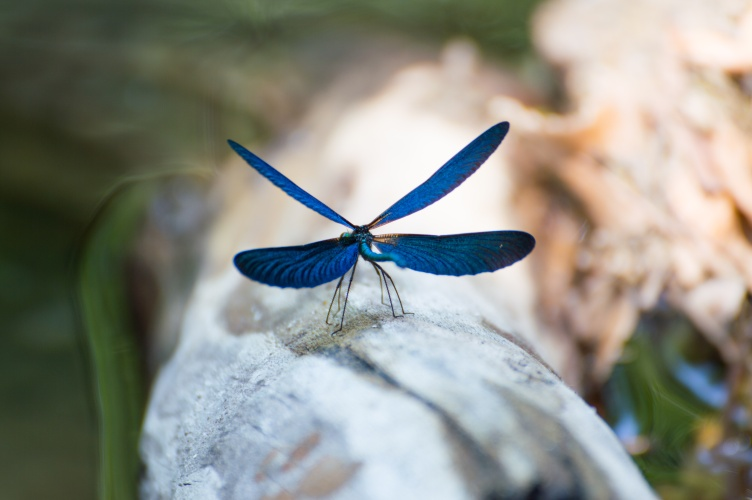

In [7]:
cv2_imshow(image)

### **Convert to grayscale**

OpenCV offers ``cv2.cvtColor()`` method which is usefull for converting an image from one color space to another.

For more info about the available color convertions click [here](https://docs.opencv.org/4.5.2/d8/d01/group__imgproc__color__conversions.html#ga4e0972be5de079fed4e3a10e24ef5ef0)

In [6]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#cv2.imshow("Gray", gray)
#cv2.waitKey(0)
# cv2.imwrite(os.path.join(image_path, 'gray.jpg'), gray)
#cv2_imshow(gray)


103

### **Extract ROI**

The following code demonstrates a way to extract a specific Region-of-Interest (ROI) of an image.

When loading an image with ``cv2.imread``, an array is created, thus, by selecting a specific range of pixels we can extract the desired ROI.

The code has commented lines for displaying the image when executing the code localy and for saving the image to gDrive. By substituting the first argument in ``cv2.imwrite`` function with a local path, the image will be saved localy on our computer.

In [1]:
roi = image[120:338, 226:538]
cv2.imshow("ROI", roi)
cv2.waitKey(0)
# cv2.imwrite(os.path.join(image_path, 'roi.jpg'), roi)
#cv2_imshow(roi)

NameError: name 'image' is not defined

### **Resize image**

In the following examples we will resize our image using the ``cv2.resize`` function.

In the first attempt, we are giving as arguments specific output dimensions of the input image. Of course, ignoring the initial aspect ratio can lead to a distorted final result.

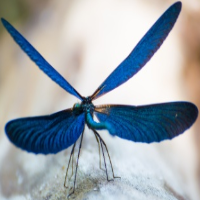

In [10]:
# resize the image to 200x200px, ignoring aspect ratio
resized = cv2.resize(roi, (200, 200))
cv2.imshow("Fixed Resizing", resized)
cv2.waitKey(0)
# cv2.imwrite(os.path.join(image_path, 'resized.jpg'), resized)
#cv2_imshow(resized)

In order to address this issue, one way is to calculate "by hand" the appropriate dimensions in order to maintain the desired/initial aspect ratio.

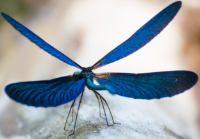

In [11]:
# fixed resizing and distort aspect ratio so let's resize the width
# to be 200px but compute the new height based on the aspect ratio
(h1, w1, d1) = roi.shape
r1 = 200.0 / w1
dim = (200, int(h1 * r1))
resized = cv2.resize(roi, dim)
cv2.imshow("Aspect Ratio Resize", resized)
cv2.waitKey(0)
# cv2.imwrite(os.path.join(image_path, 'resized_correct.jpg'), resized)
#cv2_imshow(resized)


**OR** we can take advantage of the scaling option of the ``cv2.resize`` function.

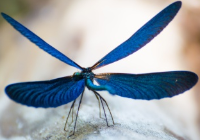

In [12]:
(h1, w1, d1) = roi.shape
s_f = 200.0/ w1
resized = cv2.resize(roi,(0,0), fx=s_f, fy=s_f)
cv2.imshow("Aspect Ratio Resize", resized)
cv2.waitKey(0)
# cv2.imwrite(os.path.join(image_path, 'resized_correct.jpg'), resized)
#cv2_imshow(resized)

### **Rotate image**

Let's rotate an image 45 degrees clockwise using OpenCV by first
computing the image center, then constructing the rotation matrix,
and then finally applying the affine warp

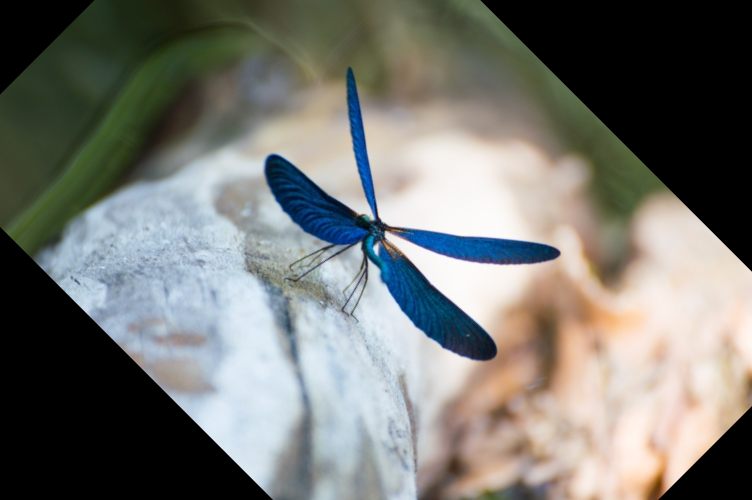

In [13]:
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, -45, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
cv2.imshow("OpenCV Rotation", rotated)
# cv2.waitKey(0)
# cv2.imwrite(os.path.join(image_path, 'roteated.jpg'), rotated)
#cv2_imshow(rotated)

### **Apply image processing filters**

 * Apply a Gaussian blur with a 11x11 kernel to the image to smooth it,
useful when reducing high frequency noise.

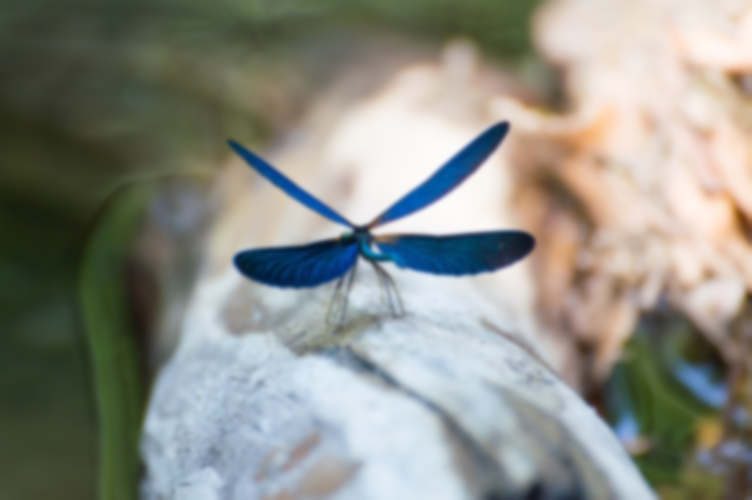

In [14]:

blurred = cv2.GaussianBlur(image, (11, 11), 0)
# cv2.imshow("Blurred", blurred)
# cv2.waitKey(0)
# cv2.imwrite(os.path.join(image_path, 'blurred.jpg'), blurred)
cv2_imshow(blurred)

### **Draw on image**

* Draw a rectangle: draw a 2px thick red rectangle surrounding the butterfly

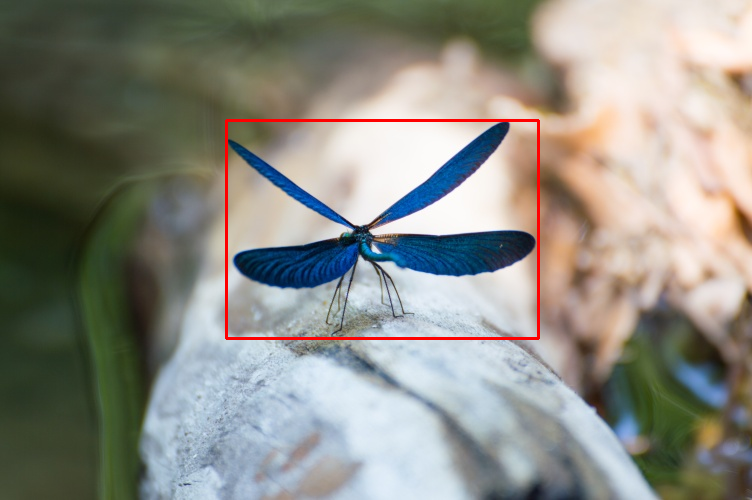

In [15]:
output = image.copy()
cv2.rectangle(output, (226, 120), (538, 338), (0, 0, 255), 2)
# cv2.imshow("Rectangle", output)
# cv2.waitKey(0)
# cv2.imwrite(os.path.join(image_path, 'output.jpg'), output)
cv2_imshow(output)

* Write text: write green text on the image

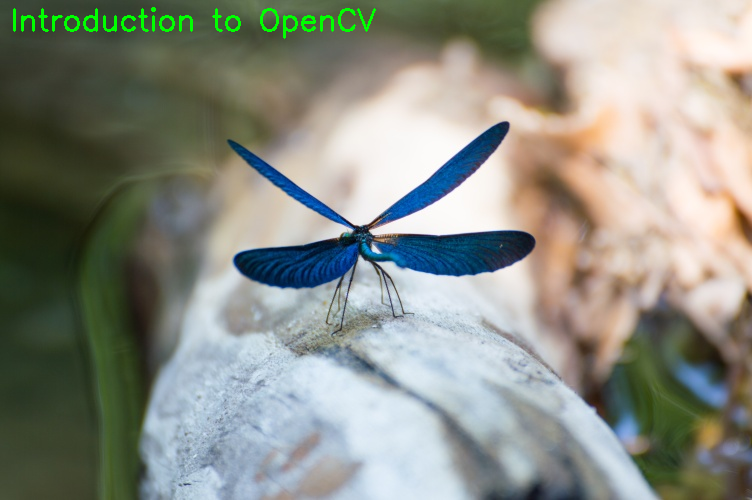

In [16]:
output = image.copy()
cv2.putText(output, "Introduction to OpenCV", (10, 30),
    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
# cv2.imshow("Text", output)
# cv2.waitKey(0)
# cv2.imwrite(os.path.join(image_path, 'output_2.jpg'), output)
cv2_imshow(output)